In [1]:
#importing necessary libraries

import numpy as np
import pandas as pd
import csv
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
print('Libraries Set up Complete')

Libraries Set up Complete


# Loading the Dataset

In [2]:
store = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
store.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Data Exploration

In [4]:
#dataset shape
store.shape

(1000, 17)

In [5]:
#checking the columns
store.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [6]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
#checking for missing values
store.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

###### No missing value

In [8]:
store.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


## Dealing with DateTime Features

In [9]:
import datetime as dt

In [10]:
#converting the Date column to datetime

store['Date'] = pd.to_datetime(store['Date'])

In [11]:
#checking to confirm the change

store['Date'].dtype

dtype('<M8[ns]')

In [12]:
#converting the Time to datetime
store['Time'] = pd.to_datetime(store['Time'])
store['Time'].dtype

dtype('<M8[ns]')

### Extracting Features from DateTime

In [13]:
#extracting the day
store['Day'] = store['Date'].dt.day

In [14]:
#extracting the month
store['Month'] = store['Date'].dt.month

In [15]:
#extracting the year
store['Year'] = store['Date'].dt.year

In [16]:
#extracting the hour
store['Hour'] = store['Time'].dt.hour

In [17]:
# checking the data to confirm the changes
store.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2022-09-11 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,5,1,2019,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2022-09-11 10:29:00,Cash,76.40,4.761905,3.8200,9.6,8,3,2019,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,2022-09-11 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,3,3,2019,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,2022-09-11 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,27,1,2019,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,2022-09-11 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,8,2,2019,10


In [18]:
#checking the number of unique hour of sales
store['Hour'].nunique()

11

In [19]:
store['Hour'].unique()

array([13, 10, 20, 18, 14, 11, 17, 16, 19, 15, 12], dtype=int64)

In [20]:
# checking the categorical columns in the data 
categorical_columns = [col for col in store.columns if store[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Payment']

## Getting the unique values of the categorical columns

In [21]:
# Branch column
store['Branch'].unique().tolist()

['A', 'C', 'B']

In [22]:
# City column
store['City'].unique().tolist()

['Yangon', 'Naypyitaw', 'Mandalay']

In [23]:
# Customer type column
store['Customer type'].unique().tolist()

['Member', 'Normal']

In [24]:
# Gender column
store['Gender'].unique().tolist()

['Female', 'Male']

In [25]:
# Product line column
store['Product line'].unique().tolist()

['Health and beauty',
 'Electronic accessories',
 'Home and lifestyle',
 'Sports and travel',
 'Food and beverages',
 'Fashion accessories']

In [26]:
# Payment column
store['Payment'].unique().tolist()

['Ewallet', 'Cash', 'Credit card']

### Checking the counts of each categorical data

In [27]:
store['Branch'].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

In [28]:
store['City'].value_counts()

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

In [29]:
store['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [30]:
store['Gender'].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

In [31]:
store['Product line'].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

In [32]:
store['Payment'].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

### Grouping by City Column

In [33]:
cities = store.groupby(['City'])

In [34]:
#exploring the new dataframe
cities.agg('sum')

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating,Day,Month,Year,Hour
City,,,,,,,,,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720,101140.64,1580.952381,5057.0320,2263.6,5068,665,670308,5029
Naypyitaw,18567.76,1831,5265.1765,110568.7065,105303.53,1561.904762,5265.1765,2319.9,4956,640,662232,4894
Yangon,18625.49,1859,5057.1605,106200.3705,101143.21,1619.047619,5057.1605,2389.2,5232,688,686460,4987


#### Naypyitaw has the highest total gross income
#### Yangon has the highest total quantity and unit price


# Data Visualizations

Text(0.5, 1.0, 'Pie Chart showing the branch with most sales')

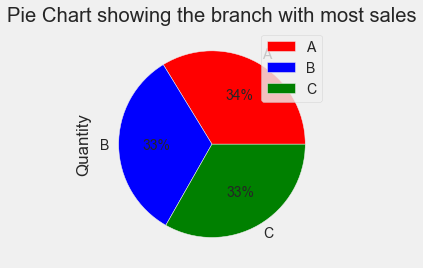

In [35]:
colors = ['red', 'blue', 'green']
store.groupby('Branch').sum().plot(kind='pie',y= 'Quantity', autopct= '%2.0f%%', colors=colors)
plt.title('Pie Chart showing the branch with most sales')

#### Branch A has the highest percentage of sales

Text(0.5, 1.0, 'Pie Chart showing the most used payment methods')

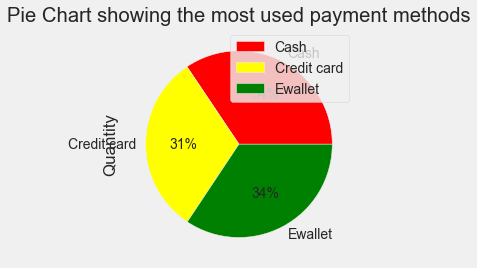

In [40]:
colors = ['red', 'yellow', 'green']
store.groupby('Payment').sum().plot(kind='pie',y= 'Quantity', autopct= '%1.0f%%', colors=colors)
plt.title('Pie Chart showing the most used payment methods')

#### The most used payment method is 'Cash'

[Text(0.5, 1.0, 'Count plot showing the payment channel for product line')]

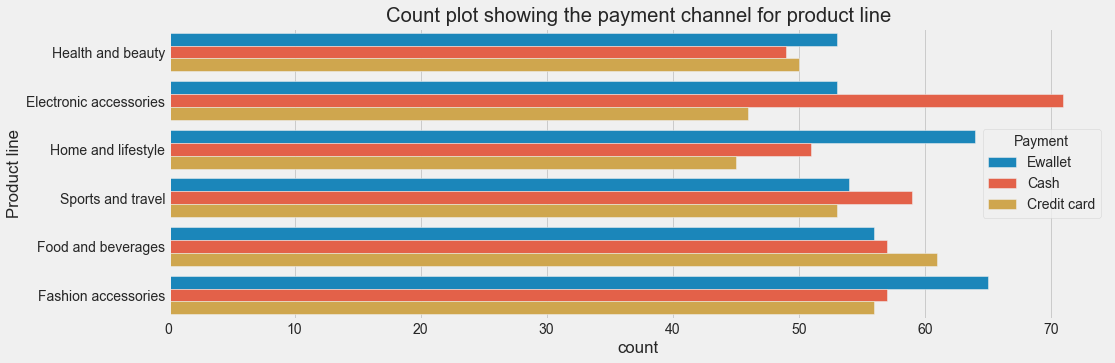

In [41]:
plt.figure(figsize= (15,5))
sns.countplot(y='Product line', data= store, hue='Payment').set(title='Count plot showing the payment channel for product line')

[Text(0.5, 1.0, 'Showing the most used Payment channel for each branch')]

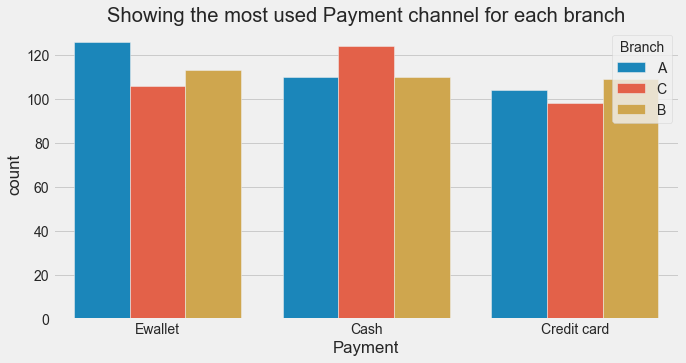

In [42]:
plt.figure(figsize= (10,5))

sns.countplot('Payment', data=store, hue='Branch').set(title='Showing the most used Payment channel for each branch')

[Text(0.5, 1.0, 'BoxPlot showing the rating for each Branch')]

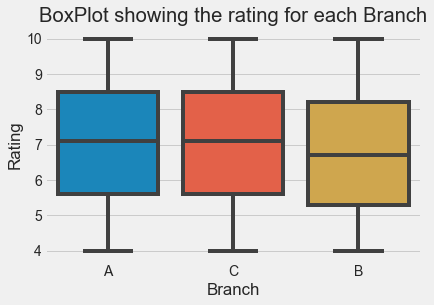

In [43]:
sns.boxplot(x='Branch', y='Rating', data=store).set(title='BoxPlot showing the rating for each Branch')

#### Branch B has the lowest rating

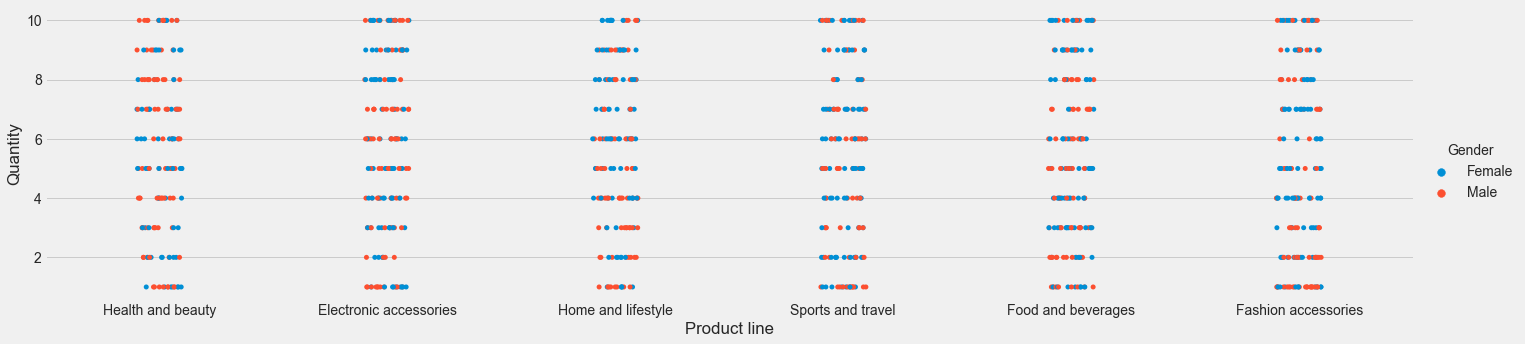

In [44]:
sns.catplot(x='Product line', y='Quantity', data=store, hue='Gender', aspect=4)

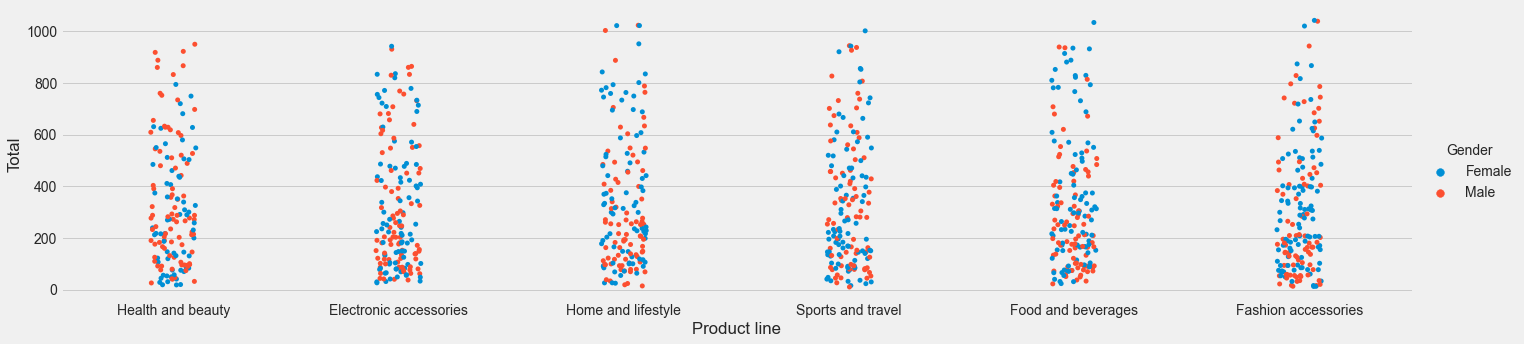

In [45]:
sns.catplot(x='Product line', y='Total', data=store, hue='Gender', aspect=4)

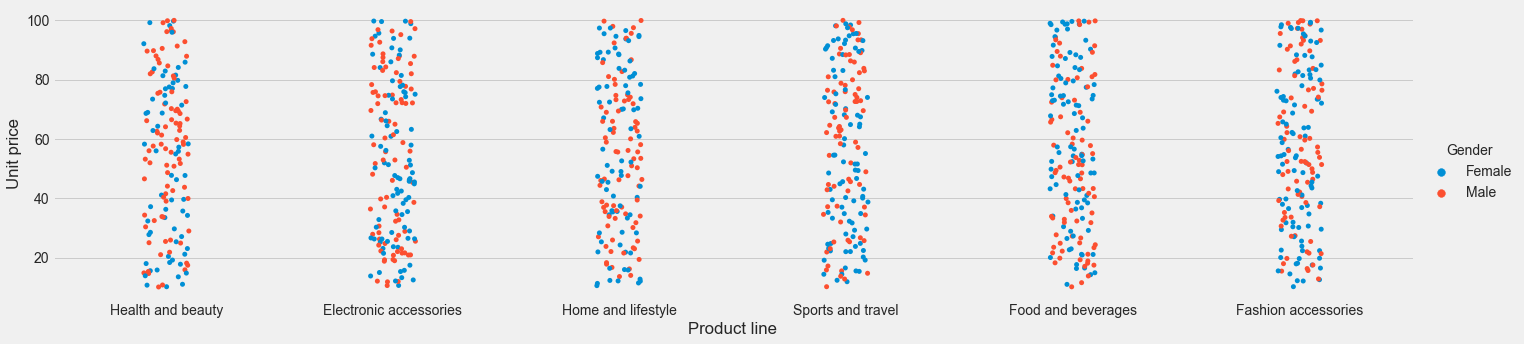

In [46]:
sns.catplot(x='Product line', y='Unit price', data=store, hue='Gender', aspect=4)

[Text(0.5, 1.0, 'Count plot showing the gender as related to product line')]

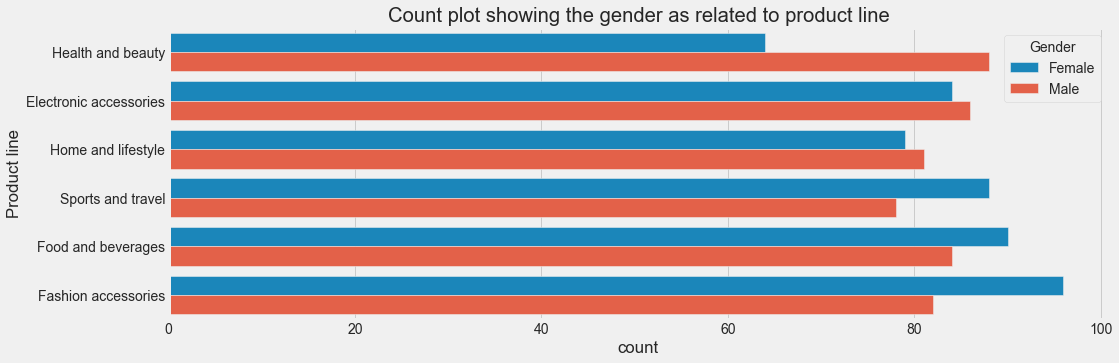

In [47]:
plt.figure(figsize= (15,5))
sns.countplot(y='Product line', data= store, hue='Gender').set(title='Count plot showing the gender as related to product line')

[Text(0.5, 1.0, 'Count plot showing the product line versus the customer type')]

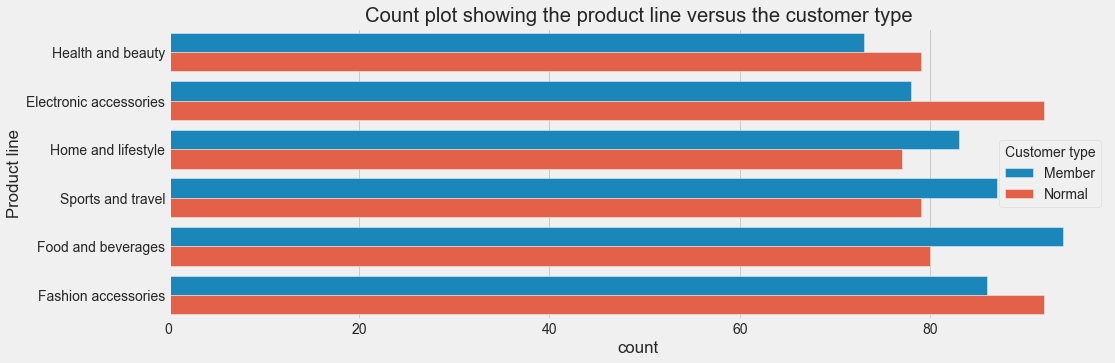

In [48]:
plt.figure(figsize = (15,5))
sns.countplot(y='Product line', data= store, hue='Customer type').set(title='Count plot showing the product line versus the customer type')

Text(0.5, 1.0, 'Line Chart Showing the Quantity of Goods sold daily')

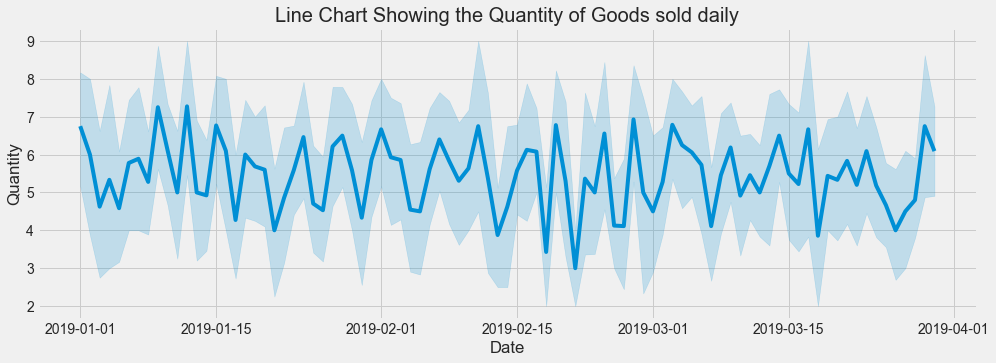

In [50]:
plt.figure(figsize=(15,5))
sns.lineplot( store.Date, store['Quantity'] ).set_title('Line Chart Showing the Quantity of Goods sold daily', fontdict = { 'fontsize': 20})

Text(0.5, 1.0, 'Line Chart Showing the Quantity on a Hourly basis')

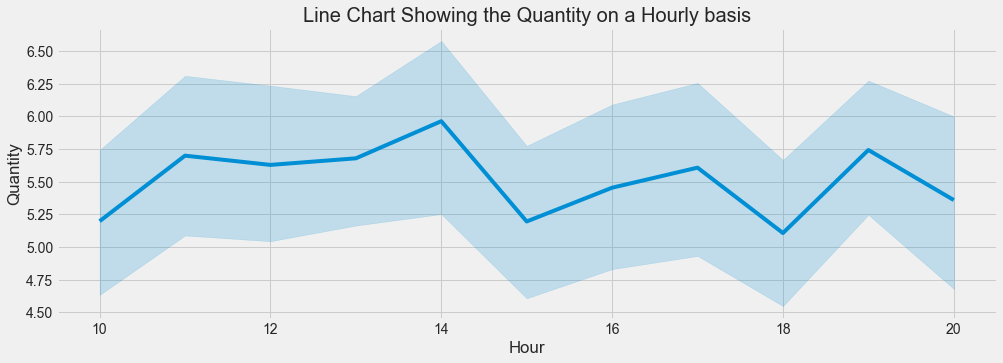

In [52]:
plt.figure(figsize=(15,5))
sns.lineplot( store.Hour, store['Quantity'] ).set_title('Line Chart Showing the Quantity on a Hourly basis', fontdict = { 'fontsize': 20})